In [2]:
import pandas as pd
df = pd.read_csv("/Users/fabiolarojas/Documents/data-science/dtsc1301:2/dtsc1302-project/women_entrepreneurship.csv", sep=";")

In [3]:
df.head()

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,4,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.1
1,6,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.0
2,17,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.5
3,18,Finland,Developed,Member,Euro,66.4,65.7,-0.20,67.7
4,19,France,Developed,Member,Euro,68.8,67.3,0.00,60.6


In [4]:
df.shape

(51, 9)

In [5]:
df = df[['Women Entrepreneurship Index', 'Level of development', 'Female Labor Force Participation Rate']]
df.head()

,Women Entrepreneurship Index,Level of development,Female Labor Force Participation Rate
0,54.9,Developed,67.1
1,63.6,Developed,58.0
2,55.4,Developed,68.5
3,66.4,Developed,67.7
4,68.8,Developed,60.6


In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Level of development'] = le.fit_transform(df['Level of development'])
df.head()

,Women Entrepreneurship Index,Level of development,Female Labor Force Participation Rate
0,54.9,0,67.1
1,63.6,0,58.0
2,55.4,0,68.5
3,66.4,0,67.7
4,68.8,0,60.6


In [7]:
X = df[['Women Entrepreneurship Index','Female Labor Force Participation Rate']]
y = df[['Level of development']]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.2)

In [9]:
print(X.shape)
print(X_train.shape) 
print(X_test.shape)

(51, 2)
(40, 2)
(11, 2)


In [10]:
import statsmodels.api as sm
model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.488234
         Iterations 6


In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     Level of development   No. Observations:                   40
Model:                            Logit   Df Residuals:                       38
Method:                             MLE   Df Model:                            1
Date:                  Tue, 05 Dec 2023   Pseudo R-squ.:                  0.2944
Time:                          16:03:31   Log-Likelihood:                -19.529
converged:                         True   LL-Null:                       -27.676
Covariance Type:              nonrobust   LLR p-value:                 5.426e-05
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Women Entrepreneurship Index             -0.1126      0.035     -3.252      0.001      -0.180      -0.045
Female Labor Force Participation Rate     0.0859      0.029      2.969      0.003       0.029       0.143
=========================================================================================================
"""

In [12]:
model.params

Women Entrepreneurship Index            -0.112572
Female Labor Force Participation Rate    0.085866
dtype: float64

In [13]:
X2 = df[['Women Entrepreneurship Index']]
y2 = df[['Level of development']]

In [18]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,random_state=0,test_size=0.2)

In [19]:
import statsmodels.api as sm
model = sm.Logit(y2_train, X2_train).fit()

Optimization terminated successfully.
         Current function value: 0.647973
         Iterations 4


In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     Level of development   No. Observations:                   40
Model:                            Logit   Df Residuals:                       39
Method:                             MLE   Df Model:                            0
Date:                  Tue, 05 Dec 2023   Pseudo R-squ.:                 0.06348
Time:                          16:04:32   Log-Likelihood:                -25.919
converged:                         True   LL-Null:                       -27.676
Covariance Type:              nonrobust   LLR p-value:                       nan
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Women Entrepreneurship Index    -0.0124      0.007     -1.844      0.065      -0.026       0.001
================================================================================================
"""

In [14]:
yhat = model.predict(X_test)
prediction = list(map(round, yhat))
print('Actual values:', list(y_test.values)) 
print('Predictions:', prediction)

Actual values: [array([1]), array([0]), array([0]), array([0]), array([0]), array([1]), array([1]), array([1]), array([0]), array([0]), array([1])]
Predictions: [1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1]


In [135]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, prediction)
print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[5 1]
 [0 5]]


In [136]:
accuracy_score(y_test, prediction)

0.9090909090909091

<Axes: >

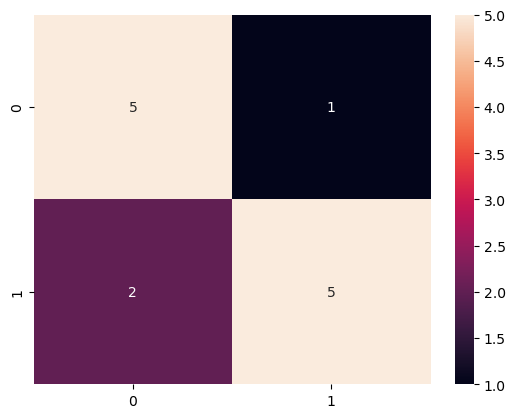

In [128]:
import seaborn as sns
sns.heatmap(cm, annot=True)

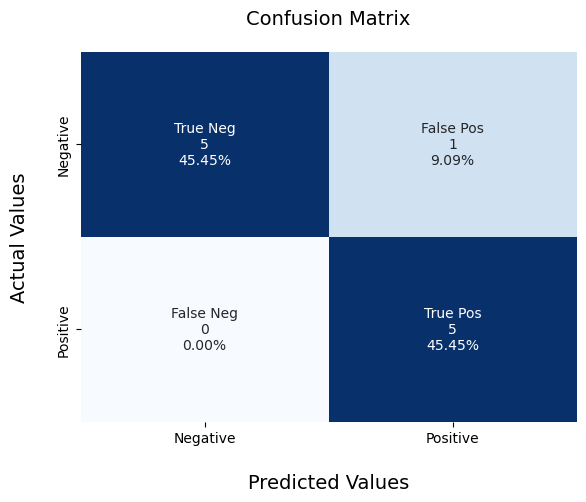

In [154]:
import numpy as np
from matplotlib import pyplot as plt

group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)


#sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)


ax = sns.heatmap(cm, annot=labels, fmt='',cmap='Blues', cbar=False )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Values", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

# set y-axis label and ticks
ax.set_ylabel("Actual Values", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

# set plot title
ax.set_title("Confusion Matrix", fontsize=14, pad=20)

plt.show()

<Axes: xlabel='Level of development', ylabel='Women Entrepreneurship Index'>

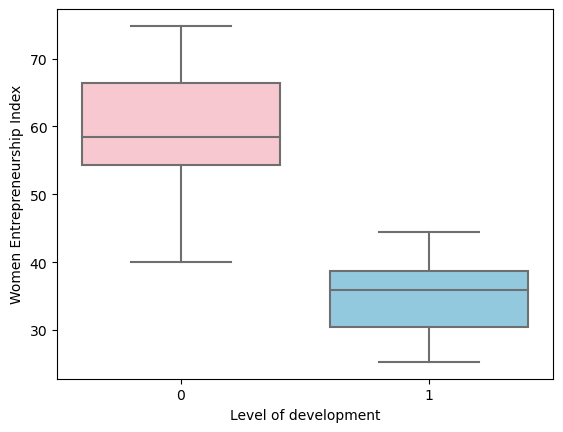

In [163]:
sns.boxplot(x='Level of development', y='Women Entrepreneurship Index', data=df)

<Axes: xlabel='Level of development', ylabel='Female Labor Force Participation Rate'>

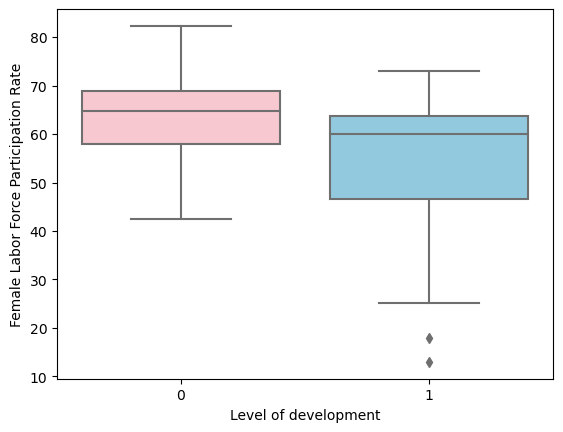

In [162]:
colors2=['pink','skyblue']
sns.boxplot(x='Level of development', y='Female Labor Force Participation Rate', data=df, palette=colors2)

<Axes: xlabel='Women Entrepreneurship Index', ylabel='Female Labor Force Participation Rate'>

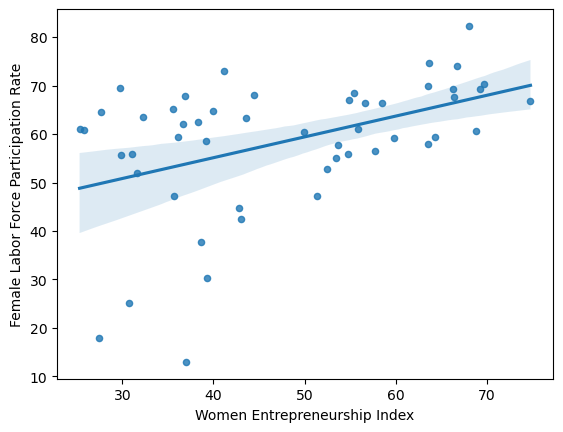

In [149]:
sns.regplot(x="Women Entrepreneurship Index", y='Female Labor Force Participation Rate', data=df, scatter_kws={'s': 20})